In [1]:
# Credits:
# https://www.kaggle.com/learn/intro-to-machine-learning

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [3]:
data_path = './data/train.csv'
data = pd.read_csv(data_path, index_col=0)

test_data_path = './data/test.csv'
test_data = pd.read_csv(test_data_path, index_col=0)

In [4]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [7]:
data.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

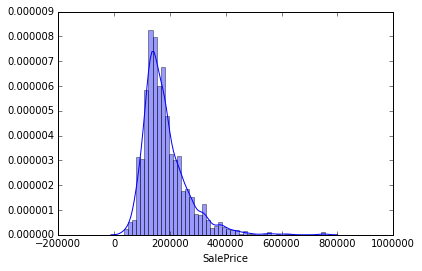

In [8]:
sns.distplot(data.SalePrice)

In [9]:
data.loc[:, data.dtypes != object].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [10]:
data.loc[:10, data.dtypes == object].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

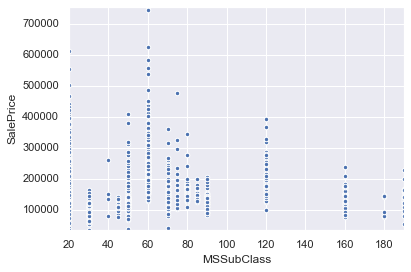

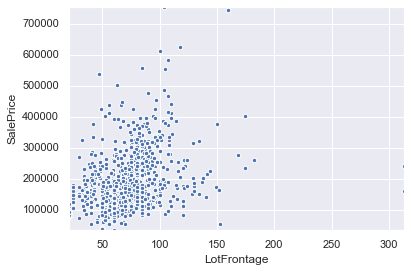

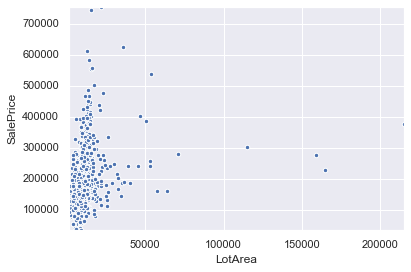

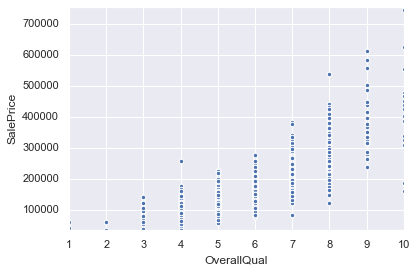

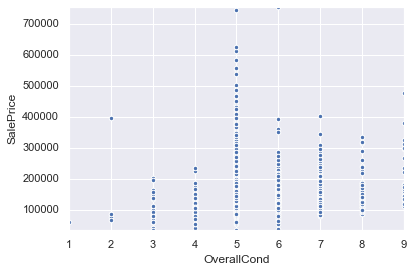

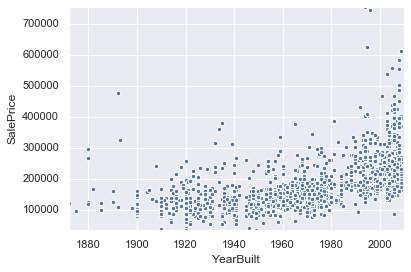

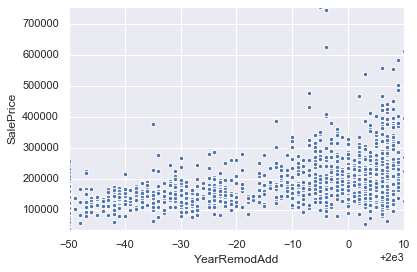

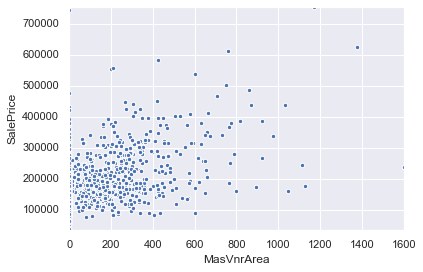

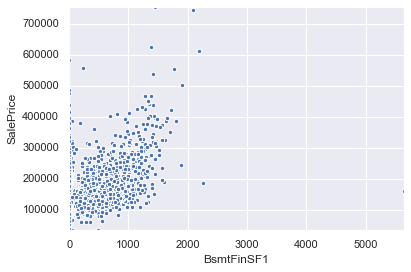

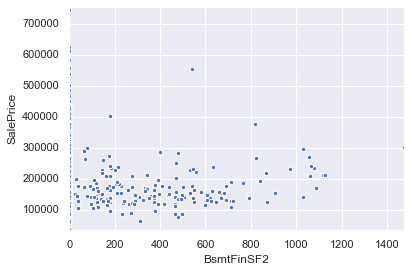

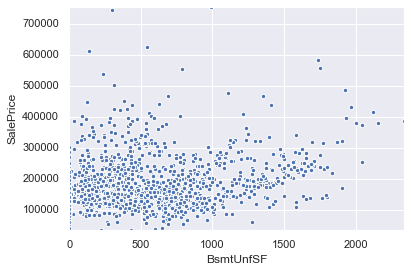

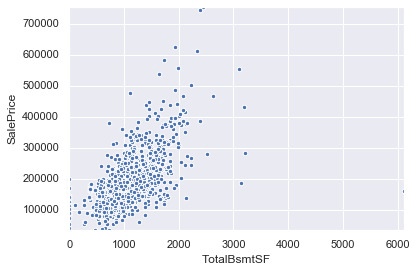

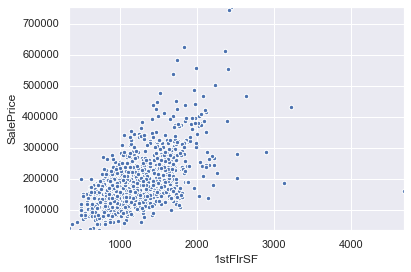

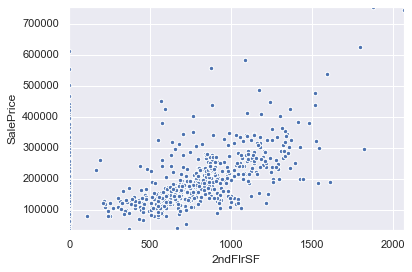

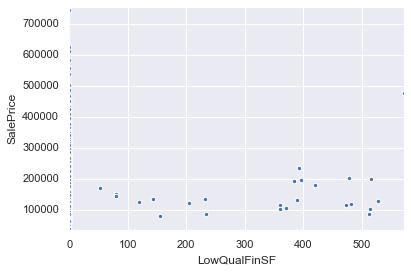

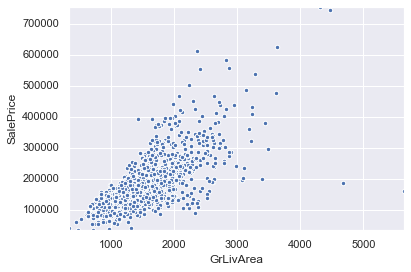

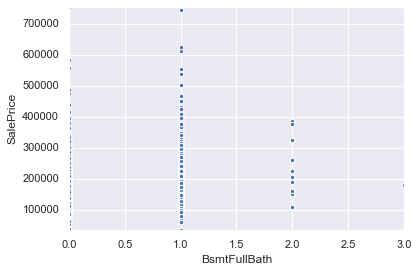

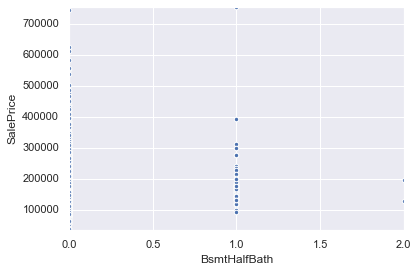

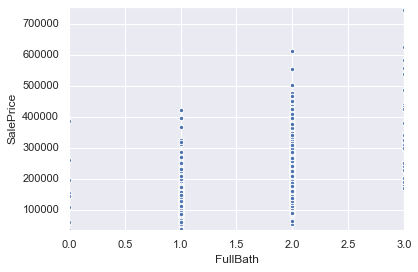

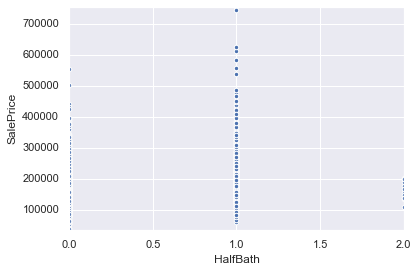

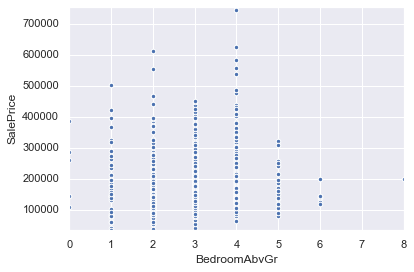

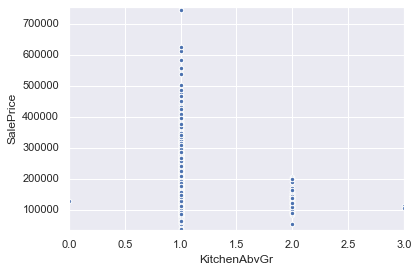

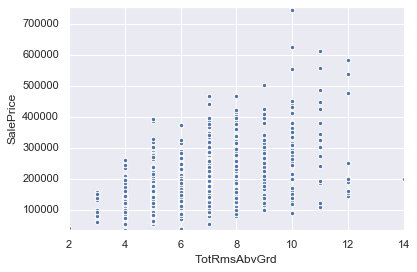

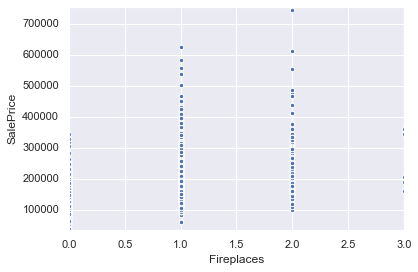

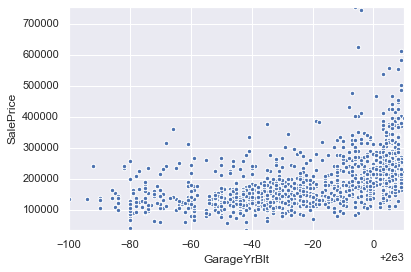

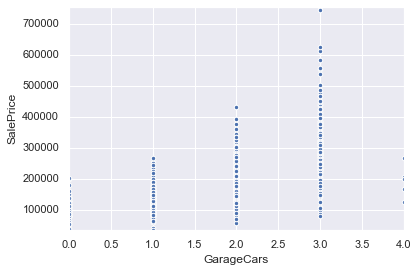

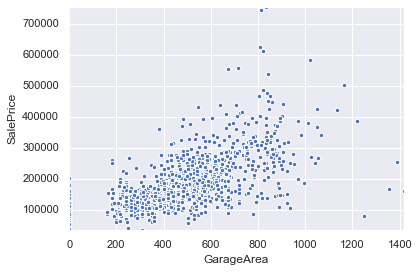

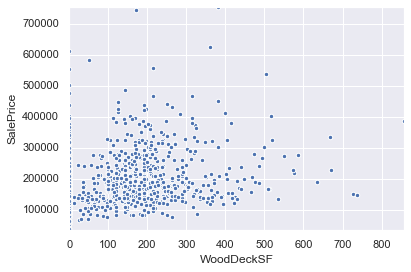

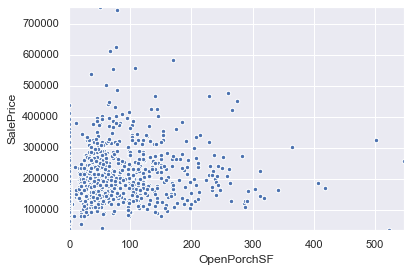

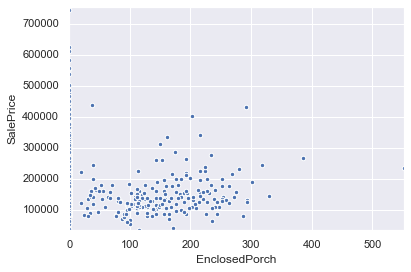

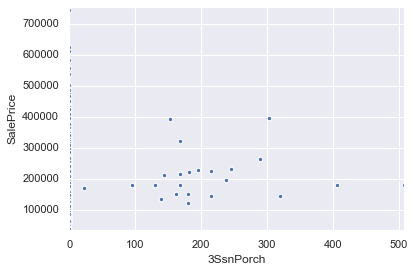

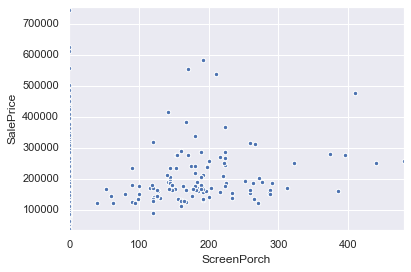

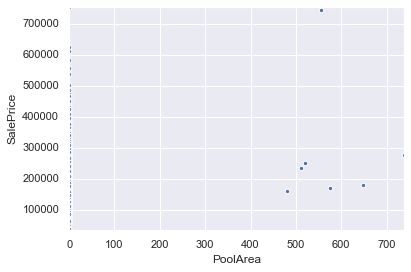

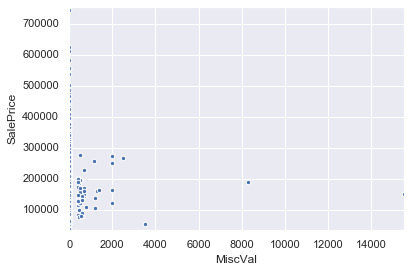

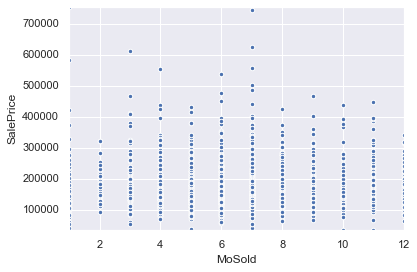

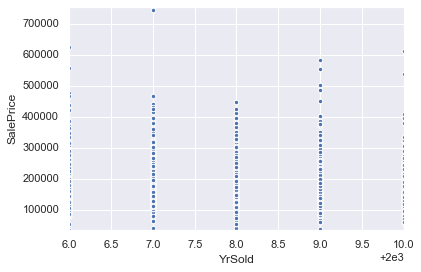

In [11]:
sns.set()
min_y = data.SalePrice.min()
max_y = data.SalePrice.max()

(data.dtypes != object)
for col in data.columns:
    if (data[col].dtype != object and col != 'SalePrice'):
        min_x = data[col].min()
        max_x = data[col].max()
        
        plot_data = pd.concat([data.SalePrice, data[col]], axis=1)
        plot_data.plot.scatter(x=col, y='SalePrice', ylim=(min_y,max_y), xlim=(min_x,max_x));

In [12]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


In [13]:
train_X, val_X, train_y, val_y = train_test_split(data.loc[:, data.columns != 'SalePrice'],
                                                  data.SalePrice, 
                                                  random_state = 0,
                                                  shuffle=True,
                                                  test_size=0.2
                                                 )
test_X = test_data.loc[:, test_data.columns != 'SalePrice']
test_idx = test_X.index

print(train_X.shape, val_X.shape, test_X.shape)

def prep_data(train_X, val_X, test_X, train_y, val_y):

    # Impute numerical values
    numeric_to_impute = [col for col in train_X.columns if train_X[col].dtype != 'object']    
    n_imputer = SimpleImputer(strategy='median')
    
    n_imputed_train_X = pd.DataFrame(n_imputer.fit_transform(train_X[numeric_to_impute]), 
                                     columns=numeric_to_impute)
    n_imputed_val_X = pd.DataFrame(n_imputer.transform(val_X[numeric_to_impute]), 
                                   columns=numeric_to_impute)
    n_imputed_test_X = pd.DataFrame(n_imputer.transform(test_X[numeric_to_impute]), 
                                    columns=numeric_to_impute)
    
    # Impute categorical values
    objects_to_impute = [col for col in train_X.columns if train_X[col].dtype == 'object']    
    o_imputer = SimpleImputer(strategy='most_frequent')
    
    o_imputed_train_X = pd.DataFrame(o_imputer.fit_transform(train_X[objects_to_impute]), 
                                     columns=objects_to_impute)
    o_imputed_val_X = pd.DataFrame(o_imputer.transform(val_X[objects_to_impute]), 
                                   columns=objects_to_impute)
    o_imputed_test_X = pd.DataFrame(o_imputer.transform(test_X[objects_to_impute]), 
                                    columns=objects_to_impute)
    
    o_imputed_train_X = o_imputed_train_X.apply(LabelEncoder().fit_transform)
    o_imputed_val_X = o_imputed_val_X.apply(LabelEncoder().fit_transform) 
    o_imputed_test_X = o_imputed_test_X.apply(LabelEncoder().fit_transform)
    
    train_X = pd.concat([n_imputed_train_X, o_imputed_train_X], axis=1)
    val_X = pd.concat([n_imputed_val_X, o_imputed_val_X], axis=1)
    test_X = pd.concat([n_imputed_test_X, o_imputed_test_X], axis=1) 
        
    count_train = len(train_X)
    count_val = len(val_X)
    count_test = len(test_X)    
    dataset = pd.concat([train_X, val_X, test_X])
    
    train_X = dataset[0:count_train]
    val_X = dataset[count_train:count_train + count_val]
    test_X = dataset[count_train+count_val:]
    
    return train_X, val_X, test_X
    
train_X, val_X, test_X = prep_data(train_X, val_X, test_X, train_y, val_y)
test_X.index = test_idx
print(train_X.shape, val_X.shape, test_X.shape)

(1168, 79) (292, 79) (1459, 79)
(1168, 79) (292, 79) (1459, 79)


In [14]:
train_X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,20.0,90.0,11694.0,9.0,5.0,2007.0,2007.0,452.0,48.0,0.0,...,1,2,4,4,2,2,2,2,6,5
1,20.0,60.0,6600.0,5.0,5.0,1962.0,1962.0,0.0,0.0,0.0,...,5,2,4,4,2,2,2,2,8,4
2,30.0,80.0,13360.0,5.0,7.0,1921.0,2006.0,0.0,713.0,0.0,...,5,2,4,4,2,2,2,2,8,4
3,20.0,69.0,13265.0,8.0,5.0,2002.0,2002.0,148.0,1218.0,0.0,...,1,1,4,4,2,2,2,2,8,4
4,20.0,118.0,13704.0,7.0,5.0,2001.0,2002.0,150.0,0.0,0.0,...,1,1,4,4,2,2,2,2,8,4


In [15]:
def check_for_na(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data.head(1)

check_for_na(train_X)

,Total,Percent
SaleCondition,0,0.0


In [16]:
trained_model = RandomForestRegressor(n_estimators= 150,
                                      criterion= 'mae',
                                      max_depth= 20,
                                      min_samples_split= 5,
                                      random_state=1)

trained_model.fit(train_X, train_y)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=150,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [17]:
predictions = trained_model.predict(test_X)
result = pd.DataFrame(predictions, index=test_X.index, columns=['SalePrice'])
result.head()

,SalePrice
Id,
1461,124852.606667
1462,155596.226667
1463,185775.230000
1464,175437.120000
1465,204569.810000


In [18]:
best_score = None
best_model = None
best_model_name = None
for name, model_and_mae in models.items():
    model = model_and_mae[0]
    mae = model_and_mae[1]
    if (not best_score or mae < best_score):
        best_model_name = name
        best_model = model
        best_score = mae
        print('New best model:' + str(best_model_name))

NameError: name 'models' is not defined

In [ ]:
best_model

In [ ]:
best_model_name

In [ ]:
best_score

In [ ]:
best_score
#First attempt: 18448.962587636935
#Second attempt: 16781.988488098665

In [ ]:
test_data.head()

In [220]:
result.to_csv('predictions.csv', index_label='Id')